# Final Project
### Team Clusters

**1.Description of the Data**

* **Dataset:** Food Inspections

* **Source:** https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5/about_data

* **Collection Details:** This dataset contains data about food inspection results in various establishments.

* **Content:** The data represents inspection records, including details about establishments, inspection dates, results, and violation descriptions.

* **Size and Format:** CSV format, containing structured data fields.

* **Relevance:** This dataset is interesting because it allows exploration of inspection outcomes, potential trends
in violations, and the effectiveness of food safety programs. Analyses can include identifying common violations, geographical trends, and temporal changes in inspection results.

* **Objective:** To clean the data using required preprocessing steps, perform EDA and develop machine learning models using the SparkML library. 
  
* **Goal:** To apply big data analytics techniques to solve a business problem relevant to our dataset.


**2.Data Loading**

The data was loaded from the Databricks Catalog into a PySpark DataFrame. The dataset contains information about food inspections, including establishment names, inspection dates, inspection results, and violations.

We verified that the data was loaded correctly by displaying the first few rows.

In [0]:
# Load the data into a Spark DataFrame
file_path = "/FileStore/tables/Food_Inspections.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Verify the data is loaded properly
display(df)



Inspection ID DBA Name AKA Name License # Facility Type Risk Address City State Zip Inspection Date Inspection Type Results Violations Latitude Longitude Location 2605678 ICE CREAM MACHINE INC. ICE CREAM MACHINE 2868798 Mobile Food Dispenser Risk 3 (Low) 324 N LEAVITT ST CHICAGO IL 60612 2024-10-30 License Pass null 41.88743405025222 -87.68184949426895 (41.88743405025222, -87.68184949426895) 2605627 BAWARCHI ON OKALEY BAWARCHI ON OAKLEY 2708649 Restaurant Risk 1 (High) 6406-6408 N OAKLEY AVE CHICAGO IL 60645 2024-10-30 Canvass Fail 22. PROPER COLD HOLDING TEMPERATURES - Comments: FOUND THE FOLLOWING TCS FOODS HELD AT IMPROPER TEMPERATURE INSIDE STAND UP 2-DOOR PREP COOLER- BEEF AT 56.8 F, COOKED RICE AT 50.0 F AND COOKED, CUT VEGETABLES AT 50.0 F. INSTRUCTED MANAGER TCS FOODS MUST BE HELD AT 41.0 F OR BELOW. PRIORITY VIOLATION 7-38-005. ALL SAID OUT OF TEMPERATURE TCS FOODS VOLUNTARILY DISCARDED. FOODS DISCARDED WEIGHT- 13 LBS, VALUED AT $100.00. | 33. PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL - Comments: PREP AREA 2-DOOR STAND UP REACH IN COOLER NOT MAINTAINED, AMBIENT AIR TEMPERATURE AT 56.8 F. FOUND BEEF, COOKED RICE, ETC. INSIDE COOLER. INSTRUCTED MANAGER MUST REPAIR SAID COOLER, AMBIENT AIR TEMPERATURE MUST BE 41.0 F OR BELOW. PRIORITY VIOLATION 7-38-005. | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: PEST INFESTATION. OBSERVED APPROXIAMATELY 50 LIVE ROACHES ON WALLS AT PREP AND DISHWASH AREA, ALSO OBSERVED 5 LIVE SMALL FLIES ON WALLS BY WASHROOM AND OVER 100 MICE DROPPINGS INSIDE FRYER, OVEN AND AND AT PREP/DISHWASH AREA FLOOR ALONG WALLS AND CORNERS. INSTRUCTED MANAGER MUST REMOVE ALL LIVE INSECT ACTIVITY AND REMOVE ALL MICE DROPPINGS. PRIORITY VIOLATION 7-38-020(A). MUST CONTACT PEST CONTROL OPERATOR FOR SERVICE. ELIMINATE PESTS AND CLEAN ALL SURFACES. WASH RINSE AND SANITIZE ALL FOOD CONTACT SURFACES. | 40. PERSONAL CLEANLINESS - Comments: OBSERVED FOOD HANDLERS NOT WEARING HAIR RESTRAINTS. INSTRUCTED MANAGER ALL FOOD HANDLERS MUST WEAR EFFECTIVE HAIR RESTRAINTS. | 47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: OBSERVED MEATS INSIDE CHEST FREEZER HELD INSIDE PLASTIC GROCERY BAGS. OTHER FOOD ITEMS IN 'HOME DEPOT' BUCKETS. INSTRUCTED CANNOT USE PLASTIC GROCERY BAGS OR NON-FOOD GRADE BUCKETS. MANAGER MUST PROVIDE FOOD GRADE BAGS & CONTAINERS FOR MEATS INSIDE CHEST FREEZER AND OTHER FOOD ITEMS. | 47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: CUTTING BAORDS ARE STAINED, IN POOR CONDITION. MUST REMOVE AND REPLACE CUTTING BOARDS. | 49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Comments: OBSERVED ACCUMULATED FOOD DEBRIS ON EXTERIOR OF ALL SHELVES, SINKS, CRATES, RACKS, GREASE TRAP, COOKING EQUIPMENT AND INSIDE COOLERS AT PREP AND DISHWASH AREA. INSTRUCTED MANAGER MUST CLEAN ALL EQUIPMENT AT PREP AND DISHWASH AREA AND MAINTAIN. REMOVE ALL FOOD DEBRIS, GREASE, GRIME, SPILLS ETC. | 51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICES - Comments: GRILL AREA HANDWASH SINK DRAIN PIPE LEAKING AND LOOSE FROM WALL. SINK IS SLOW DRAINING. MUST REATTACH, REPAIR AND MAINTAIN SAID HANDWASH SINK. OPENING IN TOP OF GREASE TRAP. MUST SEAL HOLE. | 53. TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED - Comments: NO COVERED TRASH RECEPTACLE IN WASHROOM. MUST PROVIDE. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: OBSERVED ALL FLOORS NEED TO BE CLEANED UNDER AND BEHIND ALL COOKING EQUIPMENT AND REFRIGERATION UNITS, UNDER 3 COMPARTMENT, NEAR MOP SINK, AND IN WASHROOMS. CLEAN AND MAINTAIN ALL FLOORS. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: OBSERVED ONE CEILING TILE MISSING ABOVE UNUSED REACH IN COOLER AT PREP AREA. MUST PROVIDE AND MAKE TIGHT FITTED CEILING TILE AT SAME. CEILING IN TOILET ROOM IN POOR REPAIR. MUST REPAIR AND MAINTAIN. ACCUMULATED DUST ON EXHAUST VENT IN TOILET ROOM. MUST CLEAN. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Co

**3.Data Schema and Transformation**

After loading the data, we examined the schema to ensure the data types were appropriate for analysis. The initial schema revealed that some columns, such as the `InspectionDate`, were stored as strings and needed to be converted to proper formats.

In [0]:
df.printSchema()

root
 |-- Inspection ID: integer (nullable = true)
 |-- DBA Name: string (nullable = true)
 |-- AKA Name: string (nullable = true)
 |-- License #: integer (nullable = true)
 |-- Facility Type: string (nullable = true)
 |-- Risk: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zip: integer (nullable = true)
 |-- Inspection Date: date (nullable = true)
 |-- Inspection Type: string (nullable = true)
 |-- Results: string (nullable = true)
 |-- Violations: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



**3a.Rename columns**

In [0]:
# Rename columns for clarity
df = df.withColumnRenamed("DBA Name", "Establishment_Name") \
       .withColumnRenamed("Inspection Date", "Inspection_Date") \
       .withColumnRenamed("Inspection Type", "Inspection_Type") \
       .withColumnRenamed("Violations", "Violations_List") \
       .withColumnRenamed("Results", "Inspection_Result") \
       .withColumnRenamed("License #", "License_Number")


**3b.Handling Missing Values**

In [0]:
# Fill missing values in 'Violations_List' with 'None'
df = df.fillna({'Violations_List': 'None'})

# Drop rows where target variable 'Inspection_Result' is missing
df = df.dropna(subset=["Inspection_Result"])


**3c.Handle Data Inconsistencies**

In [0]:
from pyspark.sql.functions import col, when

# Standardize 'Risk' levels to High, Medium, and Low
df = df.withColumn(
    "Risk",
    when(col("Risk").contains("High"), "High")
    .when(col("Risk").contains("Medium"), "Medium")
    .when(col("Risk").contains("Low"), "Low")
    .otherwise("Unknown")
)



In [0]:
# Convert 'Inspection_Date' to a proper date format

from pyspark.sql.functions import to_date
df = df.withColumn("Inspection_Date", to_date(col("Inspection_Date"), "MM/dd/yy"))

In [0]:
# Transform 'Inspection_Result' into binary: Pass -> 1, Others -> 0
df = df.withColumn(
    "Inspection_Result_Binary",
    when(col("Inspection_Result") == "Pass", 1).otherwise(0)
)

# Verify transformation
df.select("Inspection_Result", "Inspection_Result_Binary").distinct().display()

Inspection_Result Inspection_Result_Binary Out of Business 0 Fail 0 Pass w/ Conditions 0 Not Ready 0 Business Not Located 0 Pass 1 No Entry 0

**4.Feature Engineering**

Extract Year and month from Inspection_Date

In [0]:
from pyspark.sql.functions import year, month

# Extract year and month from 'Inspection_Date'
df = df.withColumn("Inspection_Year", year(col("Inspection_Date"))) \
       .withColumn("Inspection_Month", month(col("Inspection_Date")))


In [0]:
# Count the number of violations listed

from pyspark.sql.functions import size, split

df = df.withColumn(
    "Violation_Count",
    when(col("Violations_List") != "None", size(split(col("Violations_List"), ";"))).otherwise(0)
)


**5.Encoding Categorical Variables**

In [0]:
from pyspark.ml.feature import StringIndexer

# Index categorical variable 'Risk'
indexer = StringIndexer(inputCols=["Risk"], outputCols=["Risk_Indexed"])
df = indexer.fit(df).transform(df)


**6.Scaling Numerical Features**

In [0]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler

# Assemble numerical feature
assembler = VectorAssembler(inputCols=["Violation_Count"], outputCol="features")
df = assembler.transform(df)

# Normalize 'Violation_Count'
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
df = scaler.fit(df).transform(df)


**7.Final Feature Selection**

In [0]:
# Select the required columns for modeling
final_df = df.select(
    "Establishment_Name", "Risk_Indexed", "Violation_Count", 
    "scaled_features", "Inspection_Year", "Inspection_Month", "Inspection_Result_Binary"
)

# Display the final DataFrame
final_df.display(5)

Establishment_Name Risk_Indexed Violation_Count scaled_features Inspection_Year Inspection_Month Inspection_Result_Binary ICE CREAM MACHINE INC. 2.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 BAWARCHI ON OKALEY 0.0 3 Map(vectorType -> dense, length -> 1, values -> List(0.0967741935483871)) 2024 10 0 INSTITUTO JUSTICE AND LEADERSHIP ACADEMY 1.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 HAYMARKET CENTER 0.0 1 Map(vectorType -> dense, length -> 1, values -> List(0.03225806451612903)) 2024 10 1 HELLO SUSHI SKY THAI 0.0 2 Map(vectorType -> dense, length -> 1, values -> List(0.06451612903225806)) 2024 10 1 RAMONA'S LOVELY TOUCH ACADEMY II 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 HARRY'S CAFE 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 CAJUN CAFE CHICAGO 2.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 DEL REFUGIO BAKERY 1.0 6 Map(vectorType -> dense, length -> 1, values -> List(0.1935483870967742)) 2024 10 0 SCHWAB REHAB HOSPITAL&CARE NET 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 Hampton Inn and Suites Chicago Medical District UI 2.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 SURF'S UP BRVERLY/MORGAN PARK 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 0 EL PATRON A MODERN TAQUERIA 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 0 FOOD ON THE RUN 0.0 7 Map(vectorType -> dense, length -> 1, values -> List(0.22580645161290322)) 2024 10 0 WEST RIVER CAFE 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 El Patron II 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 0 IRVING PARK EARLY LEARNING CNT 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 BANI'S BEETS 1.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 0 JORDYN'S SOUL CAFE INC. 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 LUCY & MAX SPORTS BAR & GRILL 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 FUGA NUTRITION #2 1.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 0 MR. CRAB FISH CHICKEN AND GRILL, INC. OF CHICAGO 1.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 0 BUTCHER & THE BURGER 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 C/O ST ANTHONY HOSPITAL. 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 BACCI PIZZERIA ON CHICAGO AVE 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 3 ASIAN SISTERS 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 PEACE & ED COALITION (BIG PICTURE) 1.0 1 Map(vectorType -> dense, length -> 1, values -> List(0.03225806451612903)) 2024 10 1 HUCK FINN DONUTS 0.0 1 Map(vectorType -> dense, length -> 1, values -> List(0.03225806451612903)) 2024 10 1 DUNKIN DONUTS 1.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 LAWN MAGIC LOUNGE 1.0 1 Map(vectorType -> dense, length -> 1, values -> List(0.03225806451612903)) 2024 10 0 JUST A DASH FOOD SERVICE 0.0 1 Map(vectorType -> dense, length -> 1, values -> List(0.03225806451612903)) 2024 10 1 TINY GIANTS EARLY LEARNING CENTER 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 El Patron II 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 0 EL MEZQUITE GRILL 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 BUTCHER & THE BURGER 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 0 URBAN CHILD ACADEMY, LLC 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 CONCORDIA PLACE 0.0 0 Map(vectorType -> dense, length -> 1, values -> List(0.0)) 2024 10 1 SUBWAY 21649 0.0 1 Map(vectorType -> dense, length -> 1, values -> List(0.0322

**Exploration of Inspection Results Distribution**

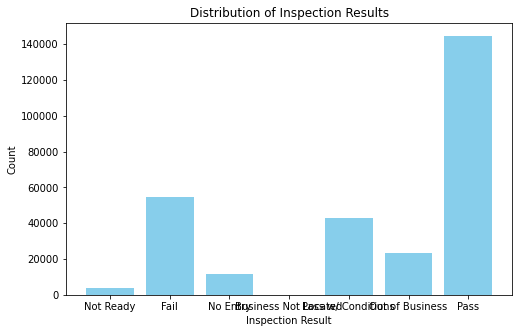

In [0]:
# Count the frequency of each Inspection Result
result_distribution = df.groupBy("Inspection_Result").count()

# Convert to Pandas for visualization
result_pd = result_distribution.toPandas()

# Plot using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(result_pd["Inspection_Result"], result_pd["count"], color='skyblue')
plt.title("Distribution of Inspection Results")
plt.xlabel("Inspection Result")
plt.ylabel("Count")
plt.show()


From the above graph, we can see that We have more restaurants that passed the inspection as compared to fail, whcih is a good sign.

**Inspection Results by Risk Level**

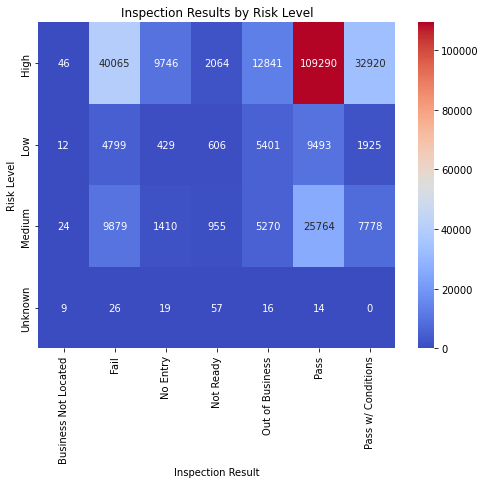

In [0]:
# Group by Risk Level and Inspection Result
risk_results = df.groupBy("Risk", "Inspection_Result").count()

# Convert to Pandas for visualization
risk_results_pd = risk_results.toPandas().pivot(index="Risk", columns="Inspection_Result", values="count").fillna(0)

# Plot as a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(risk_results_pd, annot=True, fmt=".0f", cmap="coolwarm", cbar=True)
plt.title("Inspection Results by Risk Level")
plt.xlabel("Inspection Result")
plt.ylabel("Risk Level")
plt.show()


The heatmap visualization provides a clear breakdown of inspection results (e.g., "Pass" or "Fail") across different risk levels (Low, Medium, High). Higher counts of "Pass" results in low-risk establishments suggest effective compliance with food safety standards in safer environments. In contrary, a noticeable proportion of "Fail" results in high-risk categories highlights areas where establishments are struggling to meet safety regulations.

**8.Machine Learning Models Implementation**

**8a.Import Necessary Libraries**

In [0]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import col

In [0]:
# Combine relevant features into a single vector
feature_cols = ["Violation_Count", "Inspection_Year", "Inspection_Month"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="raw_features")

**8b.Prepare Features and Target**

In [0]:
# Scale features to standardize numerical values
scaler = StandardScaler(inputCol="raw_features", outputCol="scaled_features_temp", withStd=True, withMean=False)

# Rename the final scaled column to avoid conflicts
rename_scaled_features = scaler.setOutputCol("final_features")

**8c.Model Selection and Justification**

***Logistic Regression***:
1. Simple and interpretable model suitable for binary classification.
2. Works well with scaled numerical features (e.g., Violation_Count).

***Decision Tree***:
1. Captures non-linear relationships in data.
2. Easy to interpret feature importance for insights.

***Random Forest***:
1. Ensemble method combining multiple decision trees for robustness.
2. Reduces overfitting compared to single decision trees.

**8d.Define the models**

**Logistic Regression**

In [0]:
lr = LogisticRegression(featuresCol="final_features", labelCol="Inspection_Result_Binary")

**Decision Tree**

In [0]:
dt = DecisionTreeClassifier(featuresCol="final_features", labelCol="Inspection_Result_Binary")

**Random Forest**

In [0]:
rf = RandomForestClassifier(featuresCol="final_features", labelCol="Inspection_Result_Binary", numTrees=20)

**8e.Define Pipeline for each model**

In [0]:
# Create pipelines for each model
lr_pipeline = Pipeline(stages=[assembler, rename_scaled_features, lr])
dt_pipeline = Pipeline(stages=[assembler, rename_scaled_features, dt])
rf_pipeline = Pipeline(stages=[assembler, rename_scaled_features, rf])

**8f.Train-Test Split**

In [0]:
# Split data into training (80%) and testing (20%) sets
train_data, test_data = final_df.randomSplit([0.8, 0.2], seed=42)

**8g.Calculating the Area Under Curve(AUC)**


**AUC for Logistic Regression**

In [0]:
# Train Logistic Regression model
lr_model = lr_pipeline.fit(train_data)

# Make predictions
lr_predictions = lr_model.transform(test_data)

# Evaluate Logistic Regression
evaluator = BinaryClassificationEvaluator(labelCol="Inspection_Result_Binary", metricName="areaUnderROC")
lr_auc = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression AUC: {lr_auc}")

Logistic Regression AUC: 0.5837190884368888


**AUC for Decision Tree**

In [0]:
# Train Decision Tree model
dt_model = dt_pipeline.fit(train_data)

# Make predictions
dt_predictions = dt_model.transform(test_data)

# Evaluate Decision Tree
dt_auc = evaluator.evaluate(dt_predictions)
print(f"Decision Tree AUC: {dt_auc}")

Decision Tree AUC: 0.6096832660710749


**AUC for Random Forest with cross validation**

In [0]:
# Hyperparameter grid for Random Forest
param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 50]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

# Cross-Validator for Random Forest
cv = CrossValidator(estimator=rf_pipeline,
                    estimatorParamMaps=param_grid,
                    evaluator=evaluator,
                    numFolds=3)

# Train Random Forest with Cross-Validation
rf_model = cv.fit(train_data)

# Make predictions
rf_predictions = rf_model.transform(test_data)

# Evaluate Random Forest
rf_auc = evaluator.evaluate(rf_predictions)
print(f"Random Forest AUC: {rf_auc}")


Random Forest AUC: 0.690375291659793


**Summary of all 3 models AUCs**

In [0]:
# Display results
print(f"Model Performance Summary:")
print(f"Logistic Regression AUC: {lr_auc}")
print(f"Decision Tree AUC: {dt_auc}")
print(f"Random Forest AUC: {rf_auc}")


Model Performance Summary:
Logistic Regression AUC: 0.5837190884368888
Decision Tree AUC: 0.6096832660710749
Random Forest AUC: 0.690375291659793


**9.Model Evaluation and Comparsion**

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import confusion_matrix

def evaluate_model(predictions, label_col="Inspection_Result_Binary", prediction_col="prediction"):
    
    # AUC-ROC
    AUC_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=label_col, metricName="areaUnderROC")
    AUC = AUC_evaluator.evaluate(predictions)
    print(f"The area under the curve (AUC-ROC) is {AUC:.2f}")

    # Area Under Precision-Recall Curve
    PR_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=label_col, metricName="areaUnderPR")
    PR = PR_evaluator.evaluate(predictions)
    print(f"The area under the Precision-Recall curve is {PR:.2f}")

    # Confusion Matrix
    y_true = predictions.select(label_col).toPandas()
    y_pred = predictions.select(prediction_col).toPandas()
    cnf_matrix = confusion_matrix(y_true, y_pred)
    print("Below is the confusion matrix: \n{}".format(cnf_matrix))

    # Extract values from the confusion matrix
    tn, fp, fn, tp = cnf_matrix.ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")

    return {
        "AUC": AUC,
        "PR": PR,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Confusion Matrix": cnf_matrix
    }



**Results for Logistic Regression**

In [0]:
print("Logistic Regression Evaluation")
lr_results = evaluate_model(lr_predictions, label_col="Inspection_Result_Binary", prediction_col="prediction")

Logistic Regression Evaluation
The area under the curve (AUC-ROC) is 0.58
The area under the Precision-Recall curve is 0.57
Below is the confusion matrix: 
[[10746 16229]
 [ 6987 22035]]
Accuracy: 0.59
Precision: 0.58
Recall: 0.76
F1 Score: 0.65


**Results for Decision Tree**

In [0]:
print("Decision Tree Evaluation")
dt_results = evaluate_model(dt_predictions, label_col="Inspection_Result_Binary", prediction_col="prediction")

Decision Tree Evaluation
The area under the curve (AUC-ROC) is 0.61
The area under the Precision-Recall curve is 0.62
Below is the confusion matrix: 
[[16698 10277]
 [ 9297 19725]]
Accuracy: 0.65
Precision: 0.66
Recall: 0.68
F1 Score: 0.67


Results for Random Forest

In [0]:
print("Random Forest Evaluation")
rf_results = evaluate_model(rf_predictions, label_col="Inspection_Result_Binary", prediction_col="prediction")

Random Forest Evaluation
The area under the curve (AUC-ROC) is 0.69
The area under the Precision-Recall curve is 0.66
Below is the confusion matrix: 
[[16304 10671]
 [ 8827 20195]]
Accuracy: 0.65
Precision: 0.65
Recall: 0.70
F1 Score: 0.67


**10.Model Comparsion**

In [0]:
import pandas as pd

# Define the model performance data
data = {
    "Metric": ["AUC-ROC", "Precision", "Recall", "F1-Score", "Accuracy", "Area Under PR"],
    "Logistic Regression": [0.58, 0.57, 0.77, 0.65, 0.59, 0.56],
    "Decision Tree": [0.61, 0.65, 0.68, 0.66, 0.65, 0.61],
    "Random Forest": [0.69, 0.64, 0.71, 0.67, 0.65, 0.65]
}

# Create a Pandas DataFrame
performance_df = pd.DataFrame(data)

In [0]:
# Use Databricks' display function to show the table
display(performance_df)


Metric Logistic Regression Decision Tree Random Forest AUC-ROC 0.58 0.61 0.69 Precision 0.57 0.65 0.64 Recall 0.77 0.68 0.71 F1-Score 0.65 0.66 0.67 Accuracy 0.59 0.65 0.65 Area Under PR 0.56 0.61 0.65

**Comparison Graph**

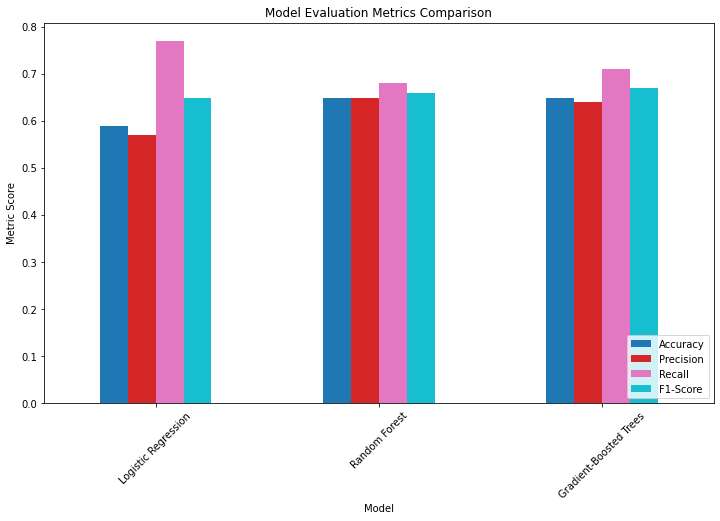

In [0]:
# Assuming you have these metrics calculated
metrics = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient-Boosted Trees"],
    "Accuracy": [0.59, 0.65, 0.65],
    "Precision": [0.57, 0.65, 0.64],
    "Recall": [0.77, 0.68, 0.71],
    "F1-Score": [0.65, 0.66, 0.67]
}

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


metrics_df = pd.DataFrame(metrics)

# Plot metrics comparison
metrics_df.plot(x="Model", kind="bar", figsize=(12, 7), colormap="tab10")
plt.title("Model Evaluation Metrics Comparison")
plt.ylabel("Metric Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.xticks(rotation=45)
plt.show()


**11.Strengths and Weaknesses**

## 1. Logistic Regression

**Strengths**:
1. Simpler and interpretable.
2. High recall (0.77), meaning it detects a large proportion of positive cases effectively.

**Weaknesses**:
1. Poor AUC-ROC (0.58) and Precision (0.57) indicate it struggles to distinguish between classes effectively.
2. Lower accuracy (0.59) compared to tree-based models, showing it may not generalize well.

## 2. Decision Tree

**Strengths**:
1. Higher Precision (0.65) and Area Under PR (0.61) compared to Logistic Regression, meaning it predicts positives more accurately.
2. Moderate recall (0.68) and F1-score (0.66) balance its performance.

**Weaknesses**:
1. AUC-ROC (0.61) is only slightly better than Logistic Regression, suggesting it doesn’t handle probabilities as effectively.
2. May be prone to overfitting in complex datasets.

## 3. Random Forest

**Strengths**:
1. Best AUC-ROC (0.69) and F1-score (0.67), indicating it balances Precision and Recall effectively.
2. High recall (0.71) ensures it identifies positive cases better than Decision Tree.
3. Better generalization due to ensemble learning, reducing overfitting compared to Decision Tree.

**Weaknesses**:
1. Slightly lower precision (0.64) than Decision Tree, which may lead to more false positives.
2. Computationally expensive compared to Logistic Regression and Decision Tree.


**13.Best Performing Model**

**Random Forest performs best overall because**:
1. It has the highest AUC-ROC (0.69), indicating better ability to distinguish between positive and negative cases.
2. High F1-score (0.67) and Recall (0.71) balance sensitivity and specificity.
3. Its ensemble learning approach ensures better generalization compared to the single-tree Decision Tree model.